In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import util

### This notebook processes BCM data by:
#####   - Calculating annual sums by water year for hydrological indices and annual averages by temperature
#####   - Calculating averages over four time periods
#####   - Creates a shapefile of this data for Sonoma County

In [3]:
#Path to data
bcm_path = "../data/raw/Sonoma County_BCM/"

In [12]:
# for loop to get averages for each watershed for each GCM we're interested in
ws_string = "SFB-PWS-*.csv" # string to get the ws/gcms we want#
#ws_string = "SFB-PWS-*-HST.csv" # file path for historical data

dfs = []
for fp in glob.glob(bcm_path + ws_string):
    _, file_name = os.path.split(fp) # split the filepath 
    read_df = util.calc_avs(fp) # calculate averages
    file_parts = file_name.split("-") # split just the file name
    read_df["watershed_num"] = file_parts[2] # get the watershed number
    gcm_clean = file_parts[3].replace('.csv','') # take out the .csv from the gcm name
    read_df["gcm"] = gcm_clean
    dfs.append(read_df)

all_ws_gcms = pd.concat(dfs)

all_ws_gcms.sample(10)

,stor,rch,run,aet,cwd,tmax,tmin,ppt,pet,watershed_num,gcm
wyear_group,,,,,,,,,,,
2070-2099,2412.016000,628.050333,78.810000,449.008333,754.074333,22.692389,8.668611,1158.584000,1204.058333,1113820001,MIROC5_rcp26
2070-2099,2685.130000,692.571667,597.380000,482.945333,813.649667,24.522944,11.156917,1770.242333,1296.738333,1113840304,CNRM_rcp85
2010-2039,1999.474667,142.263333,288.019000,450.546000,669.183333,17.437556,9.217398,875.873000,1118.952000,2201210003,MRI_rcp26
2070-2099,3656.779667,264.886333,445.023333,515.425333,701.831333,21.478111,10.062500,1208.680667,1214.410667,1113850302,PCM_A2
2070-2099,1719.724000,70.289333,58.094000,333.598333,957.581000,24.052583,10.981056,463.139000,1256.784000,6543000204,MIROC_rcp60
2010-2039,2773.302667,81.592000,72.655667,423.354667,857.019667,22.907398,8.163824,578.003000,1283.501667,3305100200,PCM_A2
2040-2069,680.013667,129.863667,101.782667,378.284667,853.132333,20.908583,10.173194,581.383667,1204.862667,2205300101,MIROC_rcp60
2040-2069,1313.821000,164.339000,94.845333,472.243667,706.879667,19.758167,11.362472,724.423333,1179.655000,2204400202,CSIRO_A1B
2070-2099,2309.659667,89.100000,103.429000,377.630667,1002.304000,28.481472,13.860611,569.962000,1357.157667,2207220001,MIROC_rcp85


In [11]:
# get historical baseline data if calculated historical data
hist_baseline = all_ws_gcms.reset_index() 
hist_baseline = hist_baseline[hist_baseline["wyear_group"].isin({"1951-1980"})]
hist_baseline.to_csv("../data/clean/soco_bcm/bcm_hist_base.csv")

In [13]:
# write all of the watershed data to csv if calculated gcms
all_ws_gcms.to_csv("../data/clean/bcm_all_ws_gcms.csv")

In [14]:
# filter to just the GCMs we are using in this analysis 
gcms_study = all_ws_gcms[all_ws_gcms["gcm"].isin({"CNRM_rcp85", "MIROC_rcp85", "HST"})].reset_index() 
gcms_study.sample(10)

,wyear_group,stor,rch,run,aet,cwd,tmax,tmin,ppt,pet,watershed_num,gcm
59,1951-1980,2633.241333,625.278667,200.213000,474.303333,684.527667,19.831250,7.432639,1304.449667,1161.057000,1113830003,HST
2295,2070-2099,2058.836000,94.814333,46.306333,333.581000,1005.101333,28.017278,12.924139,473.813667,1315.685667,2205400301,MIROC_rcp85
1374,2040-2069,1329.855333,111.304000,339.719667,414.713667,845.114667,24.205444,11.424639,855.053000,1246.195000,2203200101,MIROC_rcp85
2143,2070-2099,1377.030333,93.202000,15.047000,340.911333,952.961000,25.556056,14.208750,449.074000,1271.261333,2205300401,MIROC_rcp85
1498,2070-2099,5450.171000,166.322000,41.378667,471.102667,805.194667,23.189306,13.677028,681.078333,1275.974667,2204200400,CNRM_rcp85
493,2010-2039,2755.295333,345.555667,190.354333,470.143333,749.085667,22.479833,9.211907,1004.409000,1219.910667,1114230103,MIROC_rcp85
1140,2010-2039,779.900000,40.480000,0.020000,150.500000,0.000000,16.520000,8.406667,263.460000,150.520000,2201300001,HST
3909,2010-2039,2253.035000,8.860000,466.620000,431.696667,811.396667,24.292361,8.315889,917.698333,1250.490000,5512300503,MIROC_rcp85
2289,2040-2069,2183.251333,217.146667,190.902667,396.247667,863.046667,24.086833,9.975361,804.134667,1260.073667,2205400301,CNRM_rcp85
1496,2010-2039,5422.714000,140.605000,28.089333,477.515667,734.844000,20.674120,11.110963,640.182333,1213.563000,2204200400,CNRM_rcp85


### Combine with watershed

<AxesSubplot:>

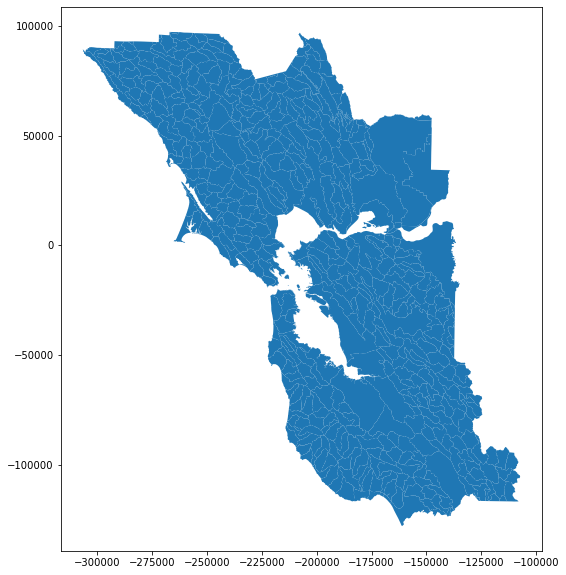

In [15]:
# read in watershed boundaries
sw_shp = gpd.read_file(bcm_path + "calw221_Bay_Area.shp")
sw_shp.plot(figsize=(10,10))

In [16]:
# combine the bcm data with the watershed shapefile
sw_shp_clean = sw_shp[["RBUASPW", "Area_acre", "geometry"]]
sw_shp_clean = sw_shp_clean.rename(columns = {'RBUASPW': 'watershed_num'})
sw_shp_clean["watershed_num"] = sw_shp_clean["watershed_num"].apply(lambda x: str(int(x)))
sw_shp_av = sw_shp_clean.merge(gcms_study, on='watershed_num', how='right')
sw_shp_av

,watershed_num,Area_acre,geometry,wyear_group,stor,rch,run,aet,cwd,tmax,tmin,ppt,pet,gcm
0,1113810002,18.1784,"POLYGON ((-303124.856 90344.759, -303135.644 9...",2010-2039,3024.890000,645.620000,160.393333,567.160000,546.973333,18.600972,8.231241,1368.600000,1115.560000,CNRM_rcp85
1,1113810002,18.1784,"POLYGON ((-303124.856 90344.759, -303135.644 9...",2040-2069,3080.833333,621.363333,186.006667,556.126667,586.023333,19.523694,9.179167,1368.560000,1142.850000,CNRM_rcp85
2,1113810002,18.1784,"POLYGON ((-303124.856 90344.759, -303135.644 9...",2070-2099,3026.986667,678.103333,236.326667,550.796667,628.266667,21.037861,10.715111,1461.646667,1179.150000,CNRM_rcp85
3,1113810002,18.1784,"POLYGON ((-303124.856 90344.759, -303135.644 9...",1951-1980,3068.763333,507.336667,33.940000,548.366667,527.106667,16.848083,7.086028,1093.346667,1077.263333,HST
4,1113810002,18.1784,"POLYGON ((-303124.856 90344.759, -303135.644 9...",2010-2039,858.500000,0.000000,0.000000,130.700000,0.000000,15.210000,5.433333,282.700000,130.700000,HST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,6543000504,40.7237,"POLYGON ((-137154.571 -37773.150, -137163.900 ...",1951-1980,1766.075000,34.168333,0.000000,271.996667,985.846667,22.024833,10.799556,306.256667,1257.915000,HST
4156,6543000504,40.7237,"POLYGON ((-137154.571 -37773.150, -137163.900 ...",2010-2039,421.150000,0.000000,0.000000,112.300000,44.850000,17.306667,9.596667,102.950000,157.150000,HST
4157,6543000504,40.7237,"POLYGON ((-137154.571 -37773.150, -137163.900 ...",2010-2039,1732.446667,16.661667,0.000000,294.815000,995.046667,23.367648,12.216380,311.211667,1289.970000,MIROC_rcp85
4158,6543000504,40.7237,"POLYGON ((-137154.571 -37773.150, -137163.900 ...",2040-2069,1698.780000,11.268333,0.000000,236.301667,1106.181667,25.761222,14.005528,247.344000,1328.105000,MIROC_rcp85


### Crop to Sonoma County watersheds

<AxesSubplot:>

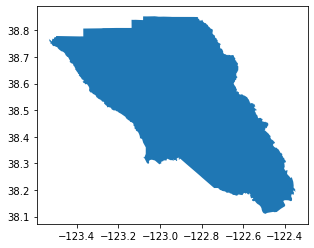

In [17]:
# read in sonoma county shapefile
soco_bound = gpd.read_file("../data/clean/sonoma_county_boundary/sonoma_county_boundary.shp")
soco_bound.plot()

In [18]:
# change crs to bcm crs
soco_crs = soco_bound.to_crs(epsg=3310)

<AxesSubplot:>

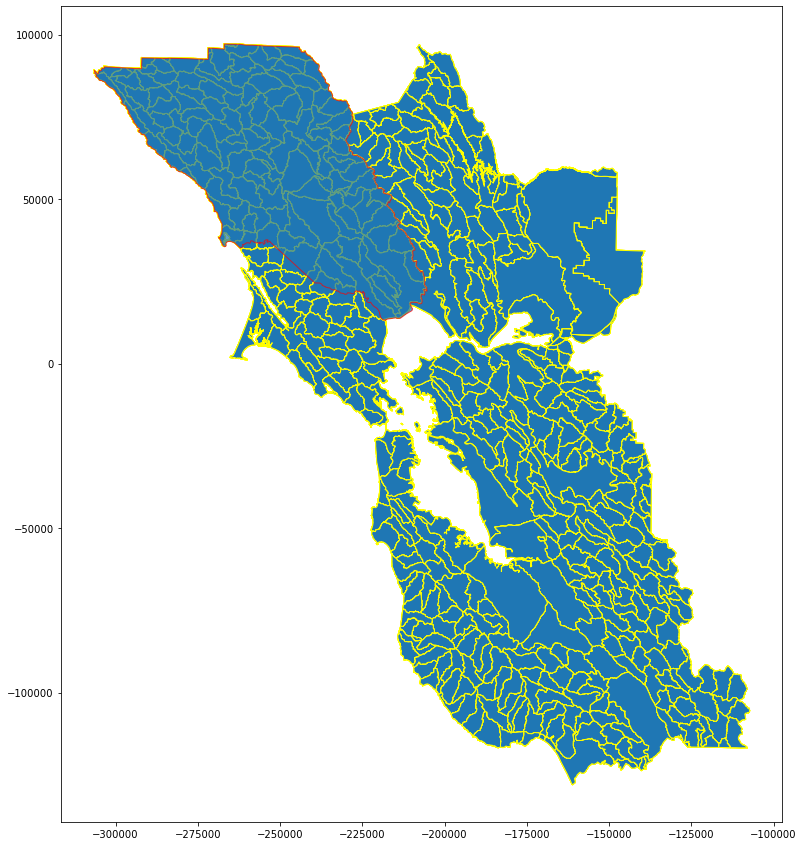

In [19]:
fig, ax = plt.subplots(figsize=(15,15))
sw_shp_av.plot(ax=ax, edgecolor = "yellow")
soco_crs.plot(ax=ax, edgecolor="red", alpha = 0.7)


<AxesSubplot:>

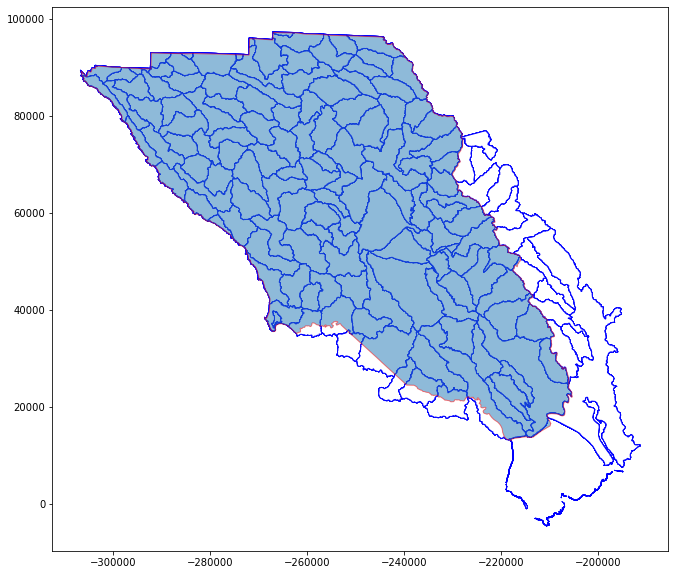

In [20]:
# just get watersheds within sonoma county
#soco_ws = gpd.overlay(sw_shp_av, soco_crs, how='intersection')
soco_ws = sw_shp_av[sw_shp_av.geometry.within(soco_crs.geometry[0]) |sw_shp_av.geometry.overlaps(soco_crs.geometry[0]) ]#.sjoin(soco_crs, how="right", op="within") 
soco_ws
fig, ax = plt.subplots(figsize=(12,10))
soco_ws.plot(ax=ax, edgecolor = "blue", color = "white")
soco_crs.plot(ax=ax, edgecolor="red", color = None, alpha = 0.5)

In [21]:
# save the shapefile
soco_ws.to_file("../data/clean/soco_bcm/soco_bcm_full_ws.shp")

C:\Users\AMarley\AppData\Local\Temp\ipykernel_36756\1389836441.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  soco_ws.to_file("../data/clean/soco_bcm/soco_bcm_full_ws.shp")


wyear_group
2010-2039    AxesSubplot(0.125,0.174147;0.62x0.656706)
2040-2069    AxesSubplot(0.125,0.174147;0.62x0.656706)
2070-2099    AxesSubplot(0.125,0.174147;0.62x0.656706)
dtype: object

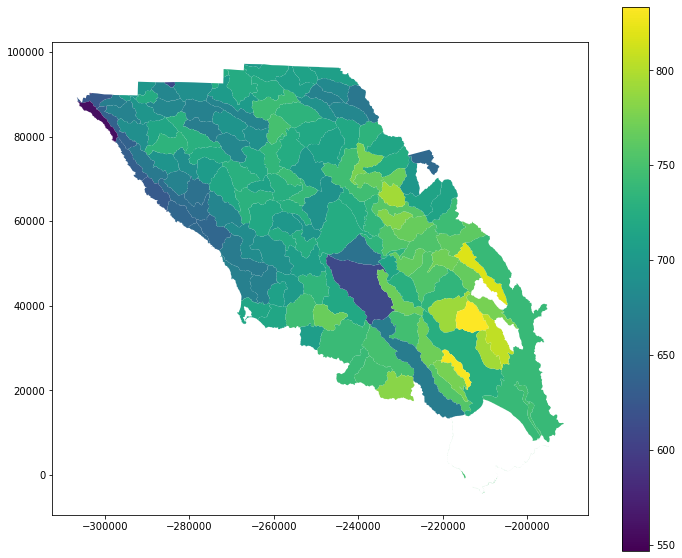

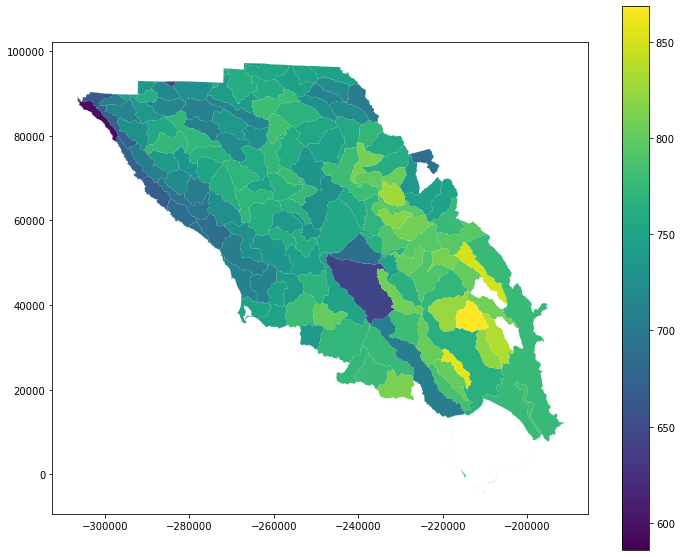

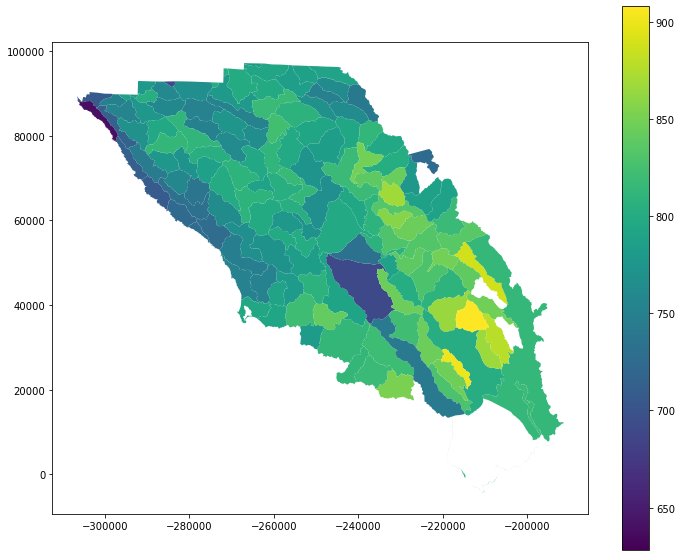

In [23]:
# Example of what the full watershed data look like
sw_shp_av_ccsm4 = soco_ws[(soco_ws["gcm"]=="CNRM_rcp85")]
sw_shp_av_ccsm4.groupby("wyear_group").plot(column="cwd", figsize = (12,10), legend=True)

C:\Users\AMarley\AppData\Local\Temp\ipykernel_36756\1370303636.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  soco_ws_int.to_file("../data/clean/soco_bcm/soco_bcm.shp")


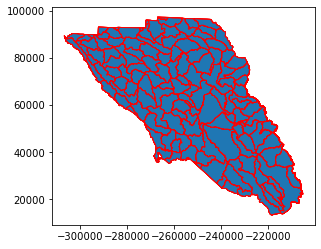

In [24]:
# intersected watersheds
soco_ws_int = gpd.overlay(sw_shp_av, soco_crs, how='intersection')
soco_ws_int.plot(edgecolor = "red")
soco_ws_int.to_file("../data/clean/soco_bcm/soco_bcm.shp")